In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, confusion_matrix
from sklearn.tree import plot_tree

In [2]:
path = "/kaggle/input/dsw2023-data/Telco_customer_churn_adapted_v2.xlsx"
df = pd.read_excel(path,index_col=0)
df.head()

,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR)
Customer ID,,,,,,,,,,,,,,,
0,2,Jakarta,Mid End,Yes,Yes,No,No,No,No,Digital Wallet,70.005,Yes,106.816666,-6.2,4210.7
1,2,Jakarta,High End,No,No,No,No,No,No,Pulsa,91.910,Yes,106.816666,-6.2,3511.3
2,8,Jakarta,High End,No,No,Yes,No,Yes,Yes,Pulsa,129.545,Yes,106.816666,-6.2,6983.6
3,28,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,136.240,Yes,106.816666,-6.2,6503.9
4,49,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Debit,134.810,Yes,106.816666,-6.2,6942.0


In [3]:
# Reset index 'Customer ID'
df = df.reset_index(drop=True)
df = pd.DataFrame(df)
df

,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR)
0,2,Jakarta,Mid End,Yes,Yes,No,No,No,No,Digital Wallet,70.005,Yes,106.816666,-6.2,4210.7
1,2,Jakarta,High End,No,No,No,No,No,No,Pulsa,91.910,Yes,106.816666,-6.2,3511.3
2,8,Jakarta,High End,No,No,Yes,No,Yes,Yes,Pulsa,129.545,Yes,106.816666,-6.2,6983.6
3,28,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,136.240,Yes,106.816666,-6.2,6503.9
4,49,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Debit,134.810,Yes,106.816666,-6.2,6942.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,72,Jakarta,Low End,No internet service,No internet service,No internet service,No,No internet service,No internet service,Debit,27.495,No,106.816666,-6.2,6897.8
7039,24,Jakarta,Mid End,Yes,No,Yes,Yes,Yes,Yes,Digital Wallet,110.240,No,106.816666,-6.2,2782.0
7040,72,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Credit,134.160,No,106.816666,-6.2,7228.0
7041,11,Jakarta,Mid End,Yes,No,No,No,No,No,Pulsa,38.480,No,106.816666,-6.2,3630.9


In [4]:
df.rename(columns={'Monthly Purchase (Thou. IDR)': 'Monthly Purchase'}, inplace=True)
df

,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase,Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR)
0,2,Jakarta,Mid End,Yes,Yes,No,No,No,No,Digital Wallet,70.005,Yes,106.816666,-6.2,4210.7
1,2,Jakarta,High End,No,No,No,No,No,No,Pulsa,91.910,Yes,106.816666,-6.2,3511.3
2,8,Jakarta,High End,No,No,Yes,No,Yes,Yes,Pulsa,129.545,Yes,106.816666,-6.2,6983.6
3,28,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,136.240,Yes,106.816666,-6.2,6503.9
4,49,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Debit,134.810,Yes,106.816666,-6.2,6942.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,72,Jakarta,Low End,No internet service,No internet service,No internet service,No,No internet service,No internet service,Debit,27.495,No,106.816666,-6.2,6897.8
7039,24,Jakarta,Mid End,Yes,No,Yes,Yes,Yes,Yes,Digital Wallet,110.240,No,106.816666,-6.2,2782.0
7040,72,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Credit,134.160,No,106.816666,-6.2,7228.0
7041,11,Jakarta,Mid End,Yes,No,No,No,No,No,Pulsa,38.480,No,106.816666,-6.2,3630.9


In [5]:
df.rename(columns={'CLTV (Predicted Thou. IDR)': 'CLTV'}, inplace=True)
df

,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase,Churn Label,Longitude,Latitude,CLTV
0,2,Jakarta,Mid End,Yes,Yes,No,No,No,No,Digital Wallet,70.005,Yes,106.816666,-6.2,4210.7
1,2,Jakarta,High End,No,No,No,No,No,No,Pulsa,91.910,Yes,106.816666,-6.2,3511.3
2,8,Jakarta,High End,No,No,Yes,No,Yes,Yes,Pulsa,129.545,Yes,106.816666,-6.2,6983.6
3,28,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,136.240,Yes,106.816666,-6.2,6503.9
4,49,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Debit,134.810,Yes,106.816666,-6.2,6942.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,72,Jakarta,Low End,No internet service,No internet service,No internet service,No,No internet service,No internet service,Debit,27.495,No,106.816666,-6.2,6897.8
7039,24,Jakarta,Mid End,Yes,No,Yes,Yes,Yes,Yes,Digital Wallet,110.240,No,106.816666,-6.2,2782.0
7040,72,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Credit,134.160,No,106.816666,-6.2,7228.0
7041,11,Jakarta,Mid End,Yes,No,No,No,No,No,Pulsa,38.480,No,106.816666,-6.2,3630.9


# Drop Kolom

In [6]:
df = df.drop(columns=['Longitude', 'Latitude'])
df

,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase,Churn Label,CLTV
0,2,Jakarta,Mid End,Yes,Yes,No,No,No,No,Digital Wallet,70.005,Yes,4210.7
1,2,Jakarta,High End,No,No,No,No,No,No,Pulsa,91.910,Yes,3511.3
2,8,Jakarta,High End,No,No,Yes,No,Yes,Yes,Pulsa,129.545,Yes,6983.6
3,28,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,136.240,Yes,6503.9
4,49,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Debit,134.810,Yes,6942.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,72,Jakarta,Low End,No internet service,No internet service,No internet service,No,No internet service,No internet service,Debit,27.495,No,6897.8
7039,24,Jakarta,Mid End,Yes,No,Yes,Yes,Yes,Yes,Digital Wallet,110.240,No,2782.0
7040,72,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Credit,134.160,No,7228.0
7041,11,Jakarta,Mid End,Yes,No,No,No,No,No,Pulsa,38.480,No,3630.9


# Feature Engineering

**Keterangan**
* Tenure months
    * pelanggan baru: 0 -12
    * pelanggan lama: 13 - 48
    * pelanggan setia: > 48
* Monthly purchase
    * low: < 50
    * medium: 50 -100
    * high: > 100
* CLTV
    * low: < 4000
    * medium: 4000 - 6000
    * high: > 6000

In [7]:
tenure_bins = [0, 12, 48, float("inf")]
tenure_labels = ['Pelanggan Baru', 'Pelanggan Lama', 'Pelanggan Setia']

purchase_bins = [-float("inf"), 50, 100, float("inf")]
purchase_labels = ['Low', 'Medium', 'High']

cltv_bins = [-float("inf"), 4000, 6000, float("inf")]
cltv_labels = ['Low', 'Medium', 'High']

df['Tenure Months'] = pd.cut(df['Tenure Months'], bins=tenure_bins, labels=tenure_labels)
df['Monthly Purchase'] = pd.cut(df['Monthly Purchase'], bins=purchase_bins, labels=purchase_labels)
df['CLTV'] = pd.cut(df['CLTV'], bins=cltv_bins, labels=cltv_labels)

df

,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase,Churn Label,CLTV
0,Pelanggan Baru,Jakarta,Mid End,Yes,Yes,No,No,No,No,Digital Wallet,Medium,Yes,Medium
1,Pelanggan Baru,Jakarta,High End,No,No,No,No,No,No,Pulsa,Medium,Yes,Low
2,Pelanggan Baru,Jakarta,High End,No,No,Yes,No,Yes,Yes,Pulsa,High,Yes,High
3,Pelanggan Lama,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,High,Yes,High
4,Pelanggan Setia,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Debit,High,Yes,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Pelanggan Setia,Jakarta,Low End,No internet service,No internet service,No internet service,No,No internet service,No internet service,Debit,Low,No,High
7039,Pelanggan Lama,Jakarta,Mid End,Yes,No,Yes,Yes,Yes,Yes,Digital Wallet,High,No,Low
7040,Pelanggan Setia,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Credit,High,No,High
7041,Pelanggan Baru,Jakarta,Mid End,Yes,No,No,No,No,No,Pulsa,Low,No,Low


In [8]:
df['Tenure Months'] = df['Tenure Months'].astype('object')
df['Monthly Purchase'] = df['Monthly Purchase'].astype('object')
df['CLTV'] = df['CLTV'].astype('object')

# Split Data

In [9]:
# Split dataset
X = df.drop(columns=['Churn Label'])
y = df['Churn Label']

In [10]:
y = y.map({'Yes': 1, 'No': 0})

In [11]:
# Split data into training and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Split data training into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)
print("Jumlah X_train: ", X_train.shape)
print("Jumlah y_train: ", y_train.shape)
print("Jumlah X_val: ", X_val.shape)
print("Jumlah y_val: ", y_val.shape)
print("Jumlah X_test: ", X_test.shape)
print("Jumlah y_test: ", y_test.shape)

Jumlah X_train:  (4507, 12)
Jumlah y_train:  (4507,)
Jumlah X_val:  (1127, 12)
Jumlah y_val:  (1127,)
Jumlah X_test:  (1409, 12)
Jumlah y_test:  (1409,)


In [12]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4507 entries, 4806 to 6651
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Tenure Months      4498 non-null   object
 1   Location           4507 non-null   object
 2   Device Class       4507 non-null   object
 3   Games Product      4507 non-null   object
 4   Music Product      4507 non-null   object
 5   Education Product  4507 non-null   object
 6   Call Center        4507 non-null   object
 7   Video Product      4507 non-null   object
 8   Use MyApp          4507 non-null   object
 9   Payment Method     4507 non-null   object
 10  Monthly Purchase   4507 non-null   object
 11  CLTV               4507 non-null   object
dtypes: object(12)
memory usage: 457.7+ KB


In [13]:
X_train

,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase,CLTV
4806,Pelanggan Lama,Jakarta,High End,No,No,No,No,Yes,Yes,Pulsa,High,Medium
3409,Pelanggan Lama,Jakarta,High End,No,No,No,Yes,No,No,Credit,High,High
3339,Pelanggan Lama,Jakarta,High End,No,Yes,No,No,Yes,No,Pulsa,High,High
3541,Pelanggan Setia,Jakarta,High End,Yes,Yes,Yes,Yes,Yes,Yes,Credit,High,High
4009,Pelanggan Baru,Jakarta,Mid End,Yes,Yes,Yes,Yes,Yes,Yes,Digital Wallet,Medium,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...
1050,Pelanggan Lama,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Pulsa,High,Low
1409,Pelanggan Baru,Jakarta,Mid End,No,No,No,Yes,No,No,Pulsa,Medium,Medium
6834,Pelanggan Setia,Jakarta,Mid End,Yes,No,Yes,No,No,No,Digital Wallet,Low,High
5685,Pelanggan Baru,Bandung,Mid End,No,No,No,No,No,No,Debit,Medium,High


In [14]:
X_test

,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase,CLTV
185,Pelanggan Lama,Jakarta,High End,No,Yes,No,No,No,Yes,Debit,High,Medium
2715,Pelanggan Lama,Jakarta,Mid End,No,Yes,No,No,No,No,Credit,Medium,High
3825,Pelanggan Baru,Bandung,Low End,No internet service,No internet service,No internet service,No,No internet service,No internet service,Digital Wallet,Low,Low
1807,Pelanggan Baru,Bandung,High End,No,Yes,No,No,No,Yes,Pulsa,High,High
132,Pelanggan Lama,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Debit,High,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...
6366,Pelanggan Setia,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Pulsa,High,High
315,Pelanggan Lama,Jakarta,High End,No,No,No,No,No,Yes,Debit,High,High
2439,Pelanggan Baru,Jakarta,High End,Yes,Yes,No,No,Yes,No,Pulsa,High,High
5002,Pelanggan Setia,Bandung,High End,Yes,Yes,Yes,No,Yes,Yes,Pulsa,High,Medium


# One Hot Encoding

In [15]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
encoded_columns = encoder.fit_transform(X_train)
df_encoded = pd.DataFrame(encoded_columns)
df_encoded.index = X_train.index
X_train_encoded = df_encoded
X_train_encoded

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
4806,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3409,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3339,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3541,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4009,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1409,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
6834,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5685,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [16]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
encoded_columns = encoder.fit_transform(X_val)
df_encoded = pd.DataFrame(encoded_columns)
df_encoded.index = X_val.index
X_val_encoded = df_encoded
X_val_encoded

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
3575,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4958,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1447,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3334,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4041,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4225,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4416,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2451,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3201,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [17]:
OH_cols_test = pd.DataFrame(encoder.transform(X_test))
df_encoded = pd.DataFrame(OH_cols_test)
df_encoded.index = X_test.index
X_test_encoded = df_encoded
X_test_encoded

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
185,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2715,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3825,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1807,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
132,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6366,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
315,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2439,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
5002,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


# Model

In [18]:
y_train

4806    0
3409    0
3339    0
3541    0
4009    0
       ..
1050    1
1409    1
6834    0
5685    0
6651    0
Name: Churn Label, Length: 4507, dtype: int64

In [19]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train_encoded, y_train)

RandomForestClassifier()

# Hyperparameter Tuning

In [20]:
param_distributions = {'n_estimators': [10, 50, 100, 200],
                       'max_depth': [None, 5, 10, 20],
                       'min_samples_split': [2, 5, 10],
                       'min_samples_leaf': [1, 2, 4]}

In [21]:
random_search = RandomizedSearchCV(random_forest, param_distributions, n_iter=10, cv=5, error_score='raise')
random_search.fit(X_train_encoded, y_train)

RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 5, 10, 20],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 50, 100, 200]})

In [22]:
rf_best = random_search.best_estimator_
rf_best.fit(X_train_encoded, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=2, n_estimators=200)

# Evaluation

In [23]:
y_pred = rf_best.predict(X_val_encoded)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       845
           1       0.65      0.40      0.49       282

    accuracy                           0.80      1127
   macro avg       0.73      0.66      0.68      1127
weighted avg       0.78      0.80      0.78      1127



In [24]:
y_test_pred = rf_best.predict(X_test_encoded)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.81      0.93      0.86      1009
           1       0.70      0.44      0.54       400

    accuracy                           0.79      1409
   macro avg       0.76      0.68      0.70      1409
weighted avg       0.78      0.79      0.77      1409



[[0.6313095 0.3686905]]


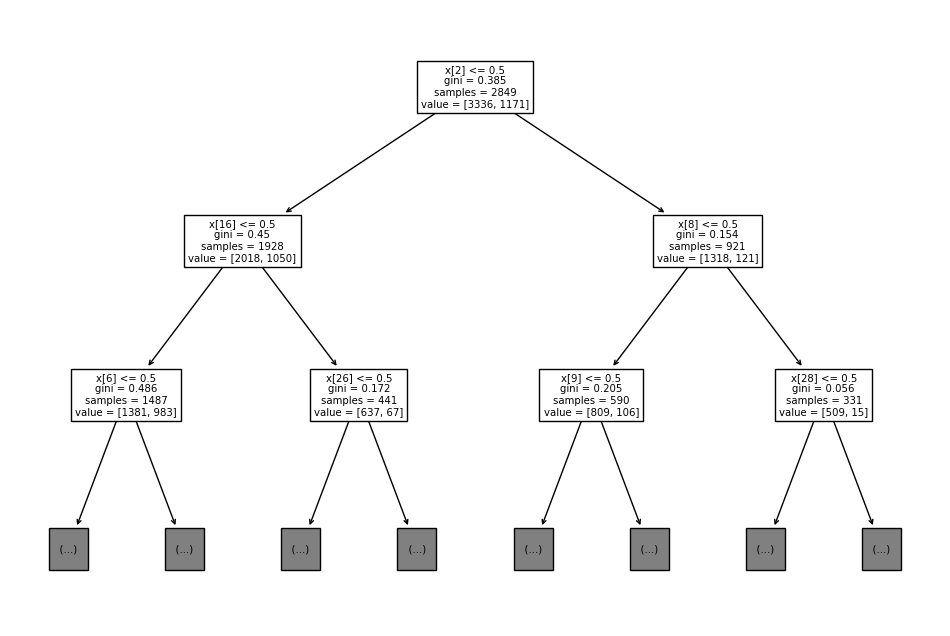

In [25]:
# Plot decision tree pertama di random forest
fig, ax = plt.subplots(figsize=(12, 8))
plot_tree(rf_best.estimators_[0], max_depth=2, ax=ax)
# Untuk memvisualisasikan probabilitas kelas di setiap node, gunakan metode `predict_proba` di seluruh random forest
# Misalnya untuk memprediksi probabilitas kelas untuk contoh pertama dalam test set:
probs = rf_best.predict_proba(X_test_encoded[:1])
print(probs)

In [26]:
y_test

185     1
2715    0
3825    0
1807    1
132     1
       ..
6366    0
315     1
2439    0
5002    0
1161    1
Name: Churn Label, Length: 1409, dtype: int64

In [27]:
y_test

185     1
2715    0
3825    0
1807    1
132     1
       ..
6366    0
315     1
2439    0
5002    0
1161    1
Name: Churn Label, Length: 1409, dtype: int64

In [28]:
y_pred_proba = rf_best.predict_proba(X_test_encoded)[:, 1]
y_pred_proba

array([0.3686905 , 0.20889777, 0.1283142 , ..., 0.50620878, 0.16993562,
       0.4657301 ])

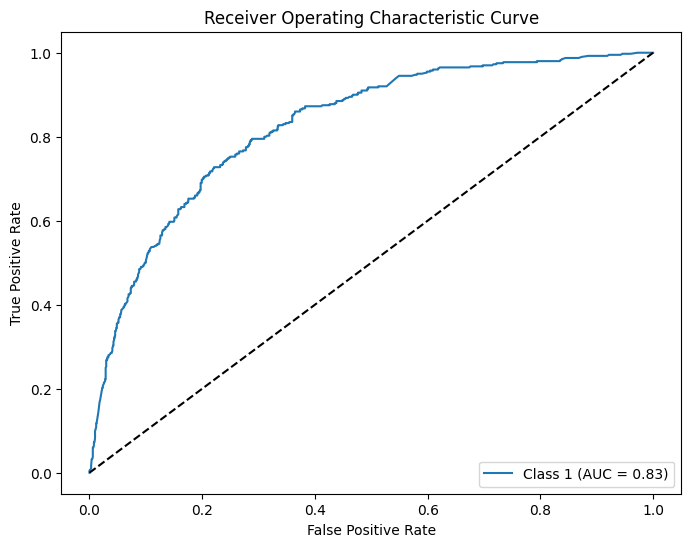

In [29]:
y_pred_proba = rf_best.predict_proba(X_test_encoded)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Class 1 (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Confusion Matrix')

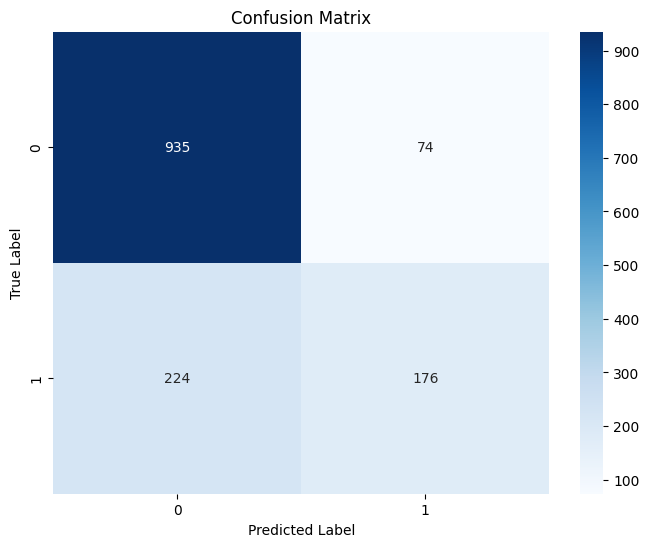

In [30]:
# Hitung confusion matrix
y_pred = rf_best.predict(X_test_encoded)
conf_matrix = confusion_matrix(y_test, y_pred)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Customer Segmentation

In [31]:
# Visualize observations that were incorrectly labeled
df_X_test_new = X_test[y_test != y_pred]
df_X_test_new

,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase,CLTV
185,Pelanggan Lama,Jakarta,High End,No,Yes,No,No,No,Yes,Debit,High,Medium
132,Pelanggan Lama,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Debit,High,Medium
3732,Pelanggan Baru,Jakarta,High End,No,No,Yes,No,Yes,No,Pulsa,High,High
1672,Pelanggan Lama,Jakarta,High End,Yes,No,No,Yes,Yes,No,Pulsa,High,High
811,Pelanggan Baru,Jakarta,Mid End,No,No,No,No,No,No,Digital Wallet,Low,High
...,...,...,...,...,...,...,...,...,...,...,...,...
926,Pelanggan Lama,Bandung,High End,No,No,No,Yes,Yes,Yes,Pulsa,High,Medium
15,Pelanggan Lama,Jakarta,High End,Yes,Yes,No,No,Yes,Yes,Credit,High,Low
315,Pelanggan Lama,Jakarta,High End,No,No,No,No,No,Yes,Debit,High,High
2439,Pelanggan Baru,Jakarta,High End,Yes,Yes,No,No,Yes,No,Pulsa,High,High


In [32]:
# Visualize observations that were incorrectly labeled
df_y_test_new = pd.DataFrame(y_test[y_test != y_pred])
df_y_test_new

,Churn Label
185,1
132,1
3732,0
1672,1
811,1
...,...
926,1
15,1
315,1
2439,0


In [33]:
# Visualize observations that were incorrectly labeled
df_y_pred_new = pd.DataFrame(y_pred[y_test != y_pred])
df_y_pred_new

,0
0,0
1,0
2,1
3,0
4,0
...,...
293,0
294,0
295,0
296,1


In [34]:
df_X_test_new.reset_index(drop=True, inplace=True)
df_y_test_new.reset_index(drop=True, inplace=True)
df_y_pred_new.reset_index(drop=True, inplace=True)

frames = [df_X_test_new, df_y_test_new, df_y_pred_new]
df_new = pd.concat(frames, axis=1)
df_new = df_new.rename(columns={0: 'Predicted Label'}) 
df_new

,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase,CLTV,Churn Label,Predicted Label
0,Pelanggan Lama,Jakarta,High End,No,Yes,No,No,No,Yes,Debit,High,Medium,1,0
1,Pelanggan Lama,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Debit,High,Medium,1,0
2,Pelanggan Baru,Jakarta,High End,No,No,Yes,No,Yes,No,Pulsa,High,High,0,1
3,Pelanggan Lama,Jakarta,High End,Yes,No,No,Yes,Yes,No,Pulsa,High,High,1,0
4,Pelanggan Baru,Jakarta,Mid End,No,No,No,No,No,No,Digital Wallet,Low,High,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,Pelanggan Lama,Bandung,High End,No,No,No,Yes,Yes,Yes,Pulsa,High,Medium,1,0
294,Pelanggan Lama,Jakarta,High End,Yes,Yes,No,No,Yes,Yes,Credit,High,Low,1,0
295,Pelanggan Lama,Jakarta,High End,No,No,No,No,No,Yes,Debit,High,High,1,0
296,Pelanggan Baru,Jakarta,High End,Yes,Yes,No,No,Yes,No,Pulsa,High,High,0,1


In [35]:
# Visualize observations that were incorrectly labeled
df_new_encoded = X_test_encoded[y_test != y_pred]
df_new_encoded

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
185,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
132,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3732,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1672,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
811,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
15,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
315,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2439,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [36]:
# importing necessary libraries
import pandas as pd
import numpy as np
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 2914.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 2914.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 2914.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 2914.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 2914.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 69, cost: 2284.0
Run 1, iteration: 2/100, moves: 13, cost: 2284.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 33, cost: 2284.0
Run 2, iteration: 2/100, moves:

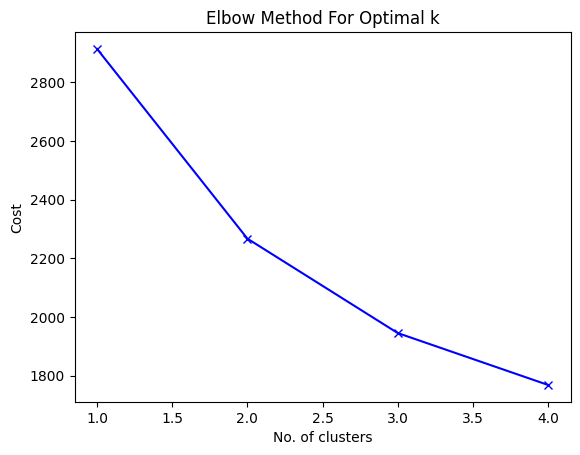

In [37]:
# Elbow curve to find optimal K
cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(df_new_encoded)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [38]:
# Building the model with 2 clusters
kmode = KModes(n_clusters=2, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(df_new_encoded)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 32, cost: 2267.0
Run 1, iteration: 2/100, moves: 6, cost: 2267.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 79, cost: 2326.0
Run 2, iteration: 2/100, moves: 37, cost: 2284.0
Run 2, iteration: 3/100, moves: 5, cost: 2284.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 82, cost: 2284.0
Run 3, iteration: 2/100, moves: 20, cost: 2274.0
Run 3, iteration: 3/100, moves: 0, cost: 2274.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 81, cost: 2319.0
Run 4, iteration: 2/100, moves: 53, cost: 2267.0
Run 4, iteration: 3/100, moves: 11, cost: 2267.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 74, cost: 2296.0
Run 5, iteratio

array([0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=u

In [39]:
df_new.insert(0, "Cluster", clusters, True)
df_new

,Cluster,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase,CLTV,Churn Label,Predicted Label
0,0,Pelanggan Lama,Jakarta,High End,No,Yes,No,No,No,Yes,Debit,High,Medium,1,0
1,0,Pelanggan Lama,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Debit,High,Medium,1,0
2,0,Pelanggan Baru,Jakarta,High End,No,No,Yes,No,Yes,No,Pulsa,High,High,0,1
3,0,Pelanggan Lama,Jakarta,High End,Yes,No,No,Yes,Yes,No,Pulsa,High,High,1,0
4,1,Pelanggan Baru,Jakarta,Mid End,No,No,No,No,No,No,Digital Wallet,Low,High,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,0,Pelanggan Lama,Bandung,High End,No,No,No,Yes,Yes,Yes,Pulsa,High,Medium,1,0
294,0,Pelanggan Lama,Jakarta,High End,Yes,Yes,No,No,Yes,Yes,Credit,High,Low,1,0
295,0,Pelanggan Lama,Jakarta,High End,No,No,No,No,No,Yes,Debit,High,High,1,0
296,0,Pelanggan Baru,Jakarta,High End,Yes,Yes,No,No,Yes,No,Pulsa,High,High,0,1


In [40]:
excel_file_path = "cluster.xlsx"
df_new.to_excel(excel_file_path, index=False)  # Set 'index' to False if you don't want to save the row indices
print(f"DataFrame has been exported to {excel_file_path}")

DataFrame has been exported to cluster.xlsx


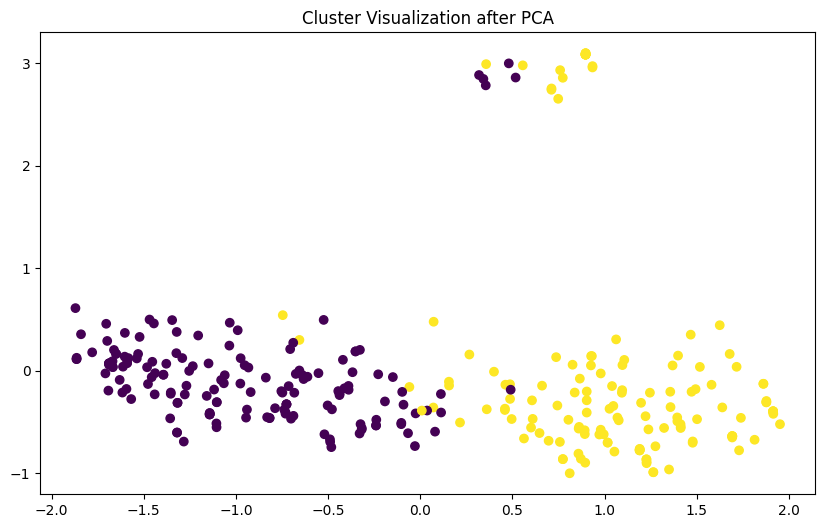

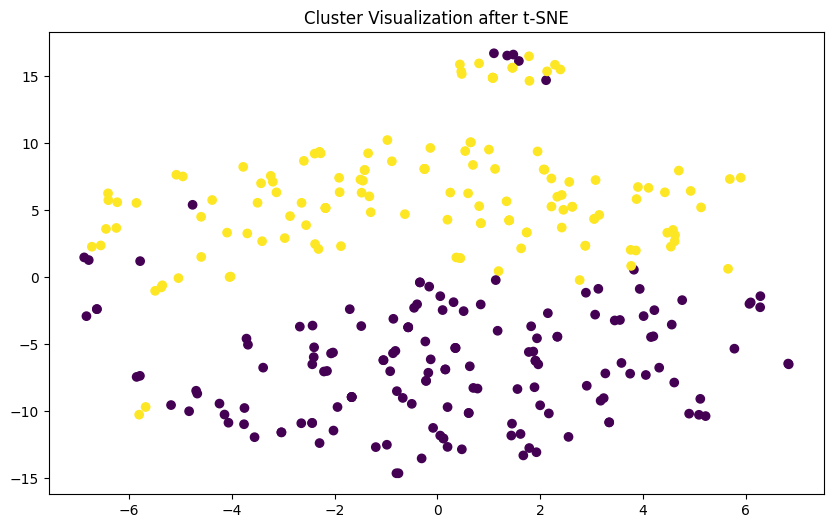

In [41]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Assuming 'clusters' contains the cluster labels for each data point

# Apply PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_new_encoded)

# Visualize the clusters after PCA
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis')
plt.title('Cluster Visualization after PCA')
plt.show()

# Alternatively, you can use t-SNE for visualization
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_result = tsne.fit_transform(df_new_encoded)

# Visualize the clusters after t-SNE
plt.figure(figsize=(10, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=clusters, cmap='viridis')
plt.title('Cluster Visualization after t-SNE')
plt.show()